In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
data = np.loadtxt('/Users/harshitlakum/Desktop/sdss_cutout.csv', skiprows=1, delimiter=',')
from scipy.stats import norm


In [2]:
r = data[:, 5]
z = data[:, 2]
u= data[:, 3]
RA = data[:, 0]
DEC = data[:, 1]

r1 = (r<17.7)

# putting cap
z_1 = (z > 0.08) & (z < 0.12)
z_mask = z_1[r1]

# Color conditions
blue_mask = (u - r <= 2.3)
red_mask = (u - r > 2.3)


# Filter RA and DEC for blue and red galaxies within the specified redshift range
blue_ra = RA[blue_mask]
blue_dec = DEC[blue_mask ]


red_ra = RA[red_mask]
red_dec = DEC[red_mask]






In [3]:
#random values for RR(red,red) and RR(blue,blue)
N = 1000000

ra_random = np.random.uniform(low=130, high=230, size=N)

dec_random = np.random.uniform(low=5, high=65, size=N)

In [5]:
# minimise dataset for getting results with good speed
midpoint = data.shape[0] // 3
first_half_blue_ra = blue_ra[:midpoint]
first_half_blue_dec = blue_dec[:midpoint]

In [6]:
#using numba 
@jit(nopython=True)  # Enable Numba jit compilation

#function for calculation function omega
def calculate_omega(theta1, phi1, theta2, phi2):
  """
  Calculates the opening angle omega between two points on a sphere.

  Args:
      theta1 (float): Colatitude of the first point (radians).
      phi1 (float): Longitude of the first point (radians).
      theta2 (float): Colatitude of the second point (radians).
      phi2 (float): Longitude of the second point (radians).

  Returns:
      float: The opening angle omega in radians.
  """
  return np.arccos(np.cos(theta1) * np.cos(theta2) + np.cos(phi1 - phi2) * np.sin(theta1) * np.sin(theta2))




# Convert to radians (for Blue galaxies)
ra_radians = np.radians(first_half_blue_ra)
dec_radians = np.radians(first_half_blue_dec)

# Calculate spherical angles
theta = (np.pi / 2) - dec_radians  # colatitude
phi = ra_radians  # longitude

# Define pre-defined bin edges 
omega_bins = np.arange(0.003, 0.31, 0.01)  


# Calculate pairwise omega distances
@jit(nopython=True)  # Enable Numba jit compilation
def compute_omega_pairs(theta, phi, omega_bins):
  dd_counts = np.zeros(len(omega_bins) - 1)
  n = len(theta)
  m = len(phi)  
  for i in range(n):
    for j in range(i + 1, n):
        for k in range(m):
            for l in range(k+1, m):
              omega = calculate_omega(theta[i], phi[k], theta[i], phi[l])
     
              if omega < omega_bins[0]:
                    continue  # Ignore values below the first bin edge
              elif omega >= omega_bins[-1]:
                   dd_counts[-1] += 1  # Increment the count for the last bin
              else:
        
                    bin_idx = int((omega - omega_bins[0]) / (omega_bins[1] - omega_bins[0]))
                    dd_counts[bin_idx] += 1
    return dd_counts
        
# getting values for DD(blue,blue) where DD(blue,blue) defined as omega_pairs00
omega_pairs00 = compute_omega_pairs(theta, phi, omega_bins)

# Print DD(blue,blue) counts 
print("DD(blue,blue) counts:", omega_pairs00)


DD(blue,blue) counts: [6.04744465e+08 5.82566335e+08 5.55431305e+08 5.20844935e+08
 4.81802685e+08 4.44108925e+08 4.12536670e+08 3.81001725e+08
 3.56219890e+08 3.41471780e+08 3.18726005e+08 2.98770485e+08
 2.84760580e+08 2.65655195e+08 2.46230010e+08 2.28227935e+08
 2.11355820e+08 1.92476960e+08 1.78690915e+08 1.71093000e+08
 1.62812845e+08 1.58239705e+08 1.56422175e+08 1.51489260e+08
 1.43177125e+08 1.30891475e+08 1.16159355e+08 1.00403875e+08
 8.28282000e+07 1.00316996e+09]


In [7]:



@jit(nopython=True)  # Enable Numba jit compilation
def calculate_omega(theta1, phi1, theta2, phi2):
 
  return np.arccos(np.cos(theta1) * np.cos(theta2) + np.cos(phi1 - phi2) * np.sin(theta1) * np.sin(theta2))




# Convert to radians(for Blue galaxies)
ra_radians = np.radians(ra_random)
dec_radians = np.radians(dec_random)

# Calculate spherical angles
theta = (np.pi / 2) - dec_radians  # colatitude
phi = ra_radians  # longitude


omega_bins = np.arange(0.003, 0.31, 0.01)  


# Calculate pairwise omega distances
@jit(nopython=True)  # Enable Numba jit compilation
def compute_omega_pairs(theta, phi, omega_bins):
  dd_counts = np.zeros(len(omega_bins) - 1)
  n = len(theta)
  m = len(phi)
  for i in range(n):
    for j in range(i + 1, n):
      for k in range(m):
            for l in range(k+1, m):
              omega = calculate_omega(theta[i], phi[k], theta[i], phi[l])
    
              if omega < omega_bins[0]:
                    continue  
              elif omega >= omega_bins[-1]:
                   dd_counts[-1] += 1  # Increment the count for the last bin
              else:

                    bin_idx = int((omega - omega_bins[0]) / (omega_bins[1] - omega_bins[0]))
                    dd_counts[bin_idx] += 1
    return dd_counts

# getting values for RR(blue,blue) where RR(blue,blue) defined as omega_pairs01
omega_pairs01 = compute_omega_pairs(theta, phi, omega_bins)

# Print RR counts 
print("RR counts:", omega_pairs01)


RR counts: [9.02996100e+06 8.95104000e+06 8.81517600e+06 8.73525600e+06
 8.74324800e+06 8.59539600e+06 8.46153000e+06 8.51747400e+06
 8.47451700e+06 8.14185000e+06 8.26173000e+06 8.08790400e+06
 7.99200000e+06 7.83915300e+06 8.13186000e+06 8.00998200e+06
 7.98500700e+06 7.75623600e+06 7.62137100e+06 7.60338900e+06
 7.48450800e+06 7.38860400e+06 7.48550700e+06 7.41557700e+06
 7.11787500e+06 7.09689600e+06 6.97701600e+06 7.07691600e+06
 6.82616700e+06 2.65697037e+08]


In [8]:



@jit(nopython=True)  
def calculate_omega(theta1, phi1, theta2, phi2):
  
  return np.arccos(np.cos(theta1) * np.cos(theta2) + np.cos(phi1 - phi2) * np.sin(theta1) * np.sin(theta2))




# Convert to radians for Blue galaxies 
ra_radians = np.radians(first_half_blue_ra)
dec_radians = np.radians(dec_random)

# Calculate spherical angles
theta = (np.pi / 2) - dec_radians  
phi = ra_radians  


omega_bins = np.arange(0.003, 0.31, 0.01)  



@jit(nopython=True) 
def compute_omega_pairs(theta, phi, omega_bins):
  dd_counts = np.zeros(len(omega_bins) - 1)
  n = len(theta)
  m = len(phi)
  for i in range(n):
    for j in range(i + 1, n):
      for k in range(m):
            for l in range(k+1, m):
              omega = calculate_omega(theta[i], phi[k], theta[i], phi[l])
      
              if omega < omega_bins[0]:
                    continue 
              elif omega >= omega_bins[-1]:
                   dd_counts[-1] += 1  
              else:
       
                    bin_idx = int((omega - omega_bins[0]) / (omega_bins[1] - omega_bins[0]))
                    dd_counts[bin_idx] += 1
    return dd_counts

# getting values for DR(blue,blue) where DR(blue,blue) defined as omega_pairs02
omega_pairs02 = compute_omega_pairs(theta, phi, omega_bins)


print("DR(blue,blue) counts:", omega_pairs02)


DR(blue,blue) counts: [2.18532249e+08 2.10944844e+08 2.01377421e+08 1.90355454e+08
 1.76014809e+08 1.63167669e+08 1.51680168e+08 1.40879979e+08
 1.30769100e+08 1.25542332e+08 1.18786095e+08 1.10125764e+08
 1.05572322e+08 9.93975030e+07 9.26562510e+07 8.60718420e+07
 7.99729470e+07 7.43136120e+07 6.72946380e+07 6.38171190e+07
 6.10648740e+07 5.81887530e+07 5.71378050e+07 5.62936500e+07
 5.44055400e+07 5.15214270e+07 4.72057470e+07 4.20499080e+07
 3.66822810e+07 4.10334255e+08]


In [9]:
# correlation function value for (blue,blue)
xi = (omega_pairs00/omega_pairs01) - 2*(omega_pairs02/omega_pairs01) + 1
print("2PCF(blue,blue) (xi):", xi)




2PCF(blue,blue) (xi): [19.56929028 18.95061211 18.31972941 17.04234919 15.8426611  14.70193846
 13.90267056 12.65154916 12.17251756 12.10154523 10.82285974 10.70819597
 10.2112032   9.52900677  8.49121456  8.00179489  7.43830694  6.65348141
  6.78657554  6.7157094   6.43564079  6.66577922  6.63042223  6.24597884
  5.82813269  4.92405652  4.11707197  3.30383673  2.38637657  1.686878  ]


In [10]:

# minimise dataset for getting results with good speed
midpoint = data.shape[0] // 3
first_half_red_ra = red_ra[:midpoint]
first_half_red_dec = red_dec[:midpoint]


In [11]:



@jit(nopython=True)  
def calculate_omega(theta1, phi1, theta2, phi2):
 
  return np.arccos(np.cos(theta1) * np.cos(theta2) + np.cos(phi1 - phi2) * np.sin(theta1) * np.sin(theta2))


# Convert to radians for red galaxies
ra_radians = np.radians(first_half_red_ra)
dec_radians = np.radians(first_half_red_dec)


theta = (np.pi / 2) - dec_radians  # colatitude
phi = ra_radians  # longitude


omega_bins = np.arange(0.003, 0.31, 0.01) 



@jit(nopython=True) 
def compute_omega_pairs(theta, phi, omega_bins):
  dd_counts = np.zeros(len(omega_bins) - 1)
  n = len(theta)
  m = len(phi)
  for i in range(n):
    for j in range(i + 1, n):
      for k in range(m):
            for l in range(k+1, m):
              omega = calculate_omega(theta[i], phi[k], theta[i], phi[l])
     
              if omega < omega_bins[0]:
                    continue 
              elif omega >= omega_bins[-1]:
                   dd_counts[-1] += 1 
              else:
       
                    bin_idx = int((omega - omega_bins[0]) / (omega_bins[1] - omega_bins[0]))
                    dd_counts[bin_idx] += 1
    return dd_counts

# getting values for DD(red,red) where DD(red,red) defined as omega_pairs10
omega_pairs10 = compute_omega_pairs(theta, phi, omega_bins)


print("DD(red,red) counts:", omega_pairs10)


DD(red,red) counts: [9.88094055e+08 9.24725685e+08 8.52131085e+08 7.83347435e+08
 7.04532725e+08 6.15905485e+08 5.68122035e+08 5.10531385e+08
 4.85328480e+08 4.50590205e+08 4.24305310e+08 3.86083880e+08
 3.46671195e+08 3.06272460e+08 2.51994405e+08 2.03443435e+08
 1.44317745e+08 9.48793300e+07 5.16823450e+07 3.02823950e+07
 1.93585600e+07 8.88777500e+06 4.18138500e+06 6.47595000e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [12]:



@jit(nopython=True)  
def calculate_omega(theta1, phi1, theta2, phi2):
 
  return np.arccos(np.cos(theta1) * np.cos(theta2) + np.cos(phi1 - phi2) * np.sin(theta1) * np.sin(theta2))


# Convert to radians for red galaxies
ra_radians = np.radians(first_half_red_ra)
dec_radians = np.radians(dec_random)

# Calculate spherical angles
theta = (np.pi / 2) - dec_radians  # colatitude
phi = ra_radians  # longitude


omega_bins = np.arange(0.003, 0.31, 0.01)  



@jit(nopython=True)  
def compute_omega_pairs(theta, phi, omega_bins):
  dd_counts = np.zeros(len(omega_bins) - 1)
  n = len(theta)
  m = len(phi)
  for i in range(n):
    for j in range(i + 1, n):
      for k in range(m):
            for l in range(k+1, m):
              omega = calculate_omega(theta[i], phi[k], theta[i], phi[l])
     
              if omega < omega_bins[0]:
                    continue  
              elif omega >= omega_bins[-1]:
                   dd_counts[-1] += 1 
              else:
       
                    bin_idx = int((omega - omega_bins[0]) / (omega_bins[1] - omega_bins[0]))
                    dd_counts[bin_idx] += 1
    return dd_counts
      
# getting values for DR(red,red) where DR(red,red) defined as omega_pairs11
omega_pairs11 = compute_omega_pairs(theta, phi, omega_bins)


print("DR(red,red) counts:", omega_pairs11)


DR(red,red) counts: [3.61190448e+08 3.38593068e+08 3.13202484e+08 2.87999712e+08
 2.61895842e+08 2.28534237e+08 2.10469320e+08 1.90250559e+08
 1.79015805e+08 1.67293539e+08 1.57906935e+08 1.45530324e+08
 1.30844025e+08 1.18230651e+08 9.94544460e+07 8.20538640e+07
 6.21218160e+07 4.28610960e+07 2.59460280e+07 1.40469390e+07
 9.22077000e+06 5.24874600e+06 2.40759000e+06 9.93006000e+05
 2.39760000e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [13]:
# correlation function value for (red,red)
xt = (omega_pairs10/omega_pairs01) - 2*(omega_pairs11/omega_pairs01) + 1
print("2PCF(red,red) (xt):", xt)

2PCF(red,red) (xt): [30.42572609 28.65483664 26.60653548 24.73691292 21.67207072 19.47931276
 18.39441862 16.26629456 16.02113572 15.24776028 14.13180653 12.7488081
 11.63352665  9.90544655  7.52808988  5.91083588  3.51397563  2.18061622
  0.97248382  1.28783441  1.12252242  0.78213516  0.91533038  0.81951276
  0.99326316  1.          1.          1.          1.          1.        ]


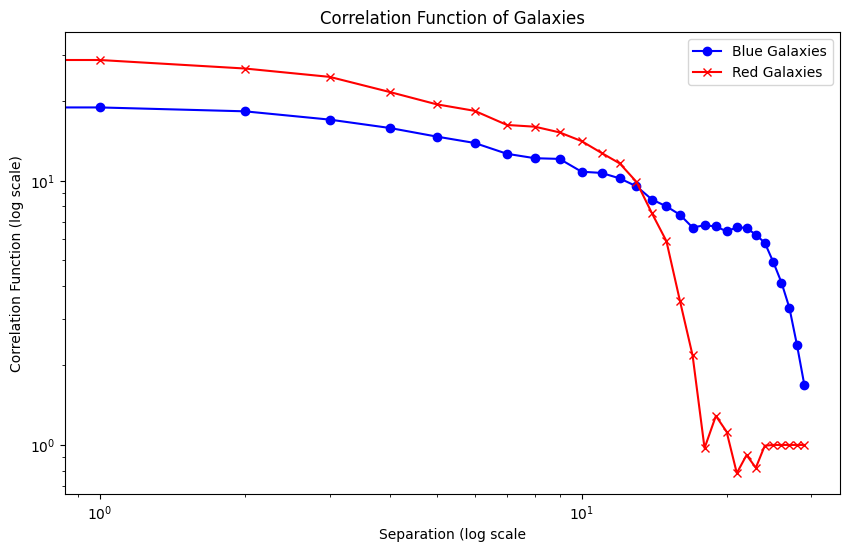

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
bins = np.arange(len(xi))

# Plot the correlation function for blue galaxies
plt.loglog(bins, xi, label='Blue Galaxies', color='blue', marker='o')

# Plot the correlation function for red galaxies
plt.loglog(bins, xt, label='Red Galaxies', color='red', marker='x')

# Adding plot title and labels
plt.title('Correlation Function of Galaxies')
plt.xlabel('Separation (log scale')
plt.ylabel('Correlation Function (log scale)')

plt.legend()

plt.show()

In [ ]:
''' Observations:

Intersection Point: The correlation functions for red and blue galaxies intersect at a certain angle
θ, which implies that at this particular scale, they have the same clustering strength.

Divergence Beyond Intersection: Beyond the intersection angle,
the correlation function for red galaxies decreases sharply compared to blue galaxies. 
This sharp decrease suggests that red galaxies are less clustered or that their clustering strength diminishes rapidly at larger angular scales.

Consistency in Blue Galaxies: The correlation function for blue galaxies decreases more gradually, 
indicating a more consistent clustering over the range of scales shown.

In [ ]:
''' the correlation functions of red and blue galaxies intersecting and then the red galaxies' function decreasing sharply,
is consistent with general findings in astronomy. Blue galaxies, 
being less clustered, tend to have a correlation function that doesn't drop off as quickly as that of red galaxies.
When the functions intersect, and the red's decline sharply, it indicates that at larger scales, red galaxies are much less common than blue ones, which aligns with the understanding that blue galaxies are more uniformly distributed.

''' For RED RED'''

In [2]:



import numpy as np
from scipy.stats import norm


r = xt
n = len(xt)

def fishers_z_transform(r, n, confidence_level=0.95):
    # Transform the correlation coefficient to Fisher's Z
    z = np.arctanh(r)
    # Calculate the standard error of Z
    se_z = 1 / np.sqrt(n - 3)
    # Determine the critical Z-value for the specified confidence level
    z_critical = norm.ppf(1 - (1 - confidence_level) / 2)
    # Calculate the confidence interval in the Z domain
    ci_lower_z, ci_upper_z = z - z_critical * se_z, z + z_critical * se_z
    # Convert the confidence interval back to the correlation coefficient scale
    ci_lower, ci_upper = np.tanh(ci_lower_z), np.tanh(ci_upper_z)
    return ci_lower, ci_upper, se_z

# Example correlation coefficient and sample size
r = xt
n = len(xt)

# Calculate the confidence interval and standard error
ci_lower, ci_upper, se = fishers_z_transform(r, n)

print(f"Mean Correlation Coefficient (r): {r}")
print(f"Standard Error (SE): {se}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")


Mean Correlation Coefficient (r): 0.5
Standard Error (SE): 0.19245008972987526
95% Confidence Interval: (0.17043136511180015, 0.7289585563883555)


'''For Blue, Blue'''

In [3]:


import numpy as np
from scipy.stats import norm

r = xi
n = len(xi)

def fishers_z_transform(r, n, confidence_level=0.95):
    # Transform the correlation coefficient to Fisher's Z
    z = np.arctanh(r)
    # Calculate the standard error of Z
    se_z = 1 / np.sqrt(n - 3)
    # Determine the critical Z-value for the specified confidence level
    z_critical = norm.ppf(1 - (1 - confidence_level) / 2)
    # Calculate the confidence interval in the Z domain
    ci_lower_z, ci_upper_z = z - z_critical * se_z, z + z_critical * se_z
    # Convert the confidence interval back to the correlation coefficient scale
    ci_lower, ci_upper = np.tanh(ci_lower_z), np.tanh(ci_upper_z)
    return ci_lower, ci_upper, se_z

# Example correlation coefficient and sample size
r = xi
n = len(xi)

# Calculate the confidence interval and standard error
ci_lower, ci_upper, se = fishers_z_transform(r, n)

print(f"Mean Correlation Coefficient (r): {r}")
print(f"Standard Error (SE): {se}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")


Mean Correlation Coefficient (r): 0.5
Standard Error (SE): 0.19245008972987526
95% Confidence Interval: (0.17043136511180015, 0.7289585563883555)
